In [1]:
#Building Decision Tree classification model with Python Step by Step


In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
dataset = pd.read_excel("D:/data/marketing.xlsx")

In [3]:
dataset

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60


In [4]:
dataset.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


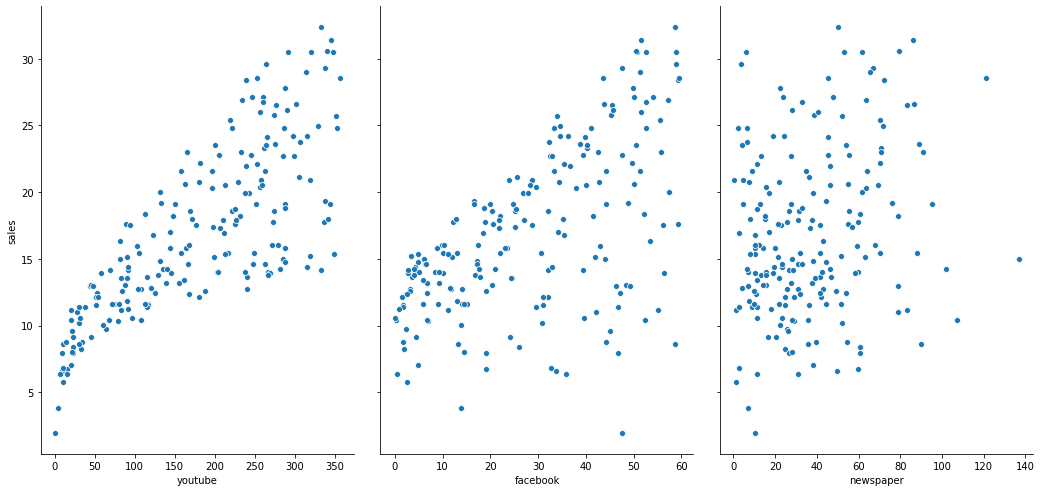

In [5]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
sns.pairplot(dataset, x_vars=['youtube','facebook','newspaper'], y_vars='sales', size=7, aspect=0.7)

In [6]:
dataset.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
#Discretization using cut method of pandas package
cut_labels = ['Low','Medium','High'] 
cut_bins = [0, 10, 20, 100] #0: min, 100: max
dataset['sale_label'] = pd.cut(dataset['sales'], bins=cut_bins, labels=cut_labels)

In [59]:
dataset

,youtube,facebook,newspaper,sales,sale_label
0,276.12,45.36,83.04,26.52,High
1,53.40,47.16,54.12,12.48,Medium
2,20.64,55.08,83.16,11.16,Medium
3,181.80,49.56,70.20,22.20,High
4,216.96,12.96,70.08,15.48,Medium
...,...,...,...,...,...
195,45.84,4.44,16.56,9.12,Low
196,113.04,5.88,9.72,11.64,Medium
197,212.40,11.16,7.68,15.36,Medium
198,340.32,50.40,79.44,30.60,High


In [9]:
dataset.groupby('sale_label').size()

sale_label
Low        22
Medium    119
High       59
dtype: int64

In [10]:
dataset.drop('sales', axis=1, inplace =True) #drop column sales
dataset

,youtube,facebook,newspaper,sale_label
0,276.12,45.36,83.04,High
1,53.40,47.16,54.12,Medium
2,20.64,55.08,83.16,Medium
3,181.80,49.56,70.20,High
4,216.96,12.96,70.08,Medium
...,...,...,...,...
195,45.84,4.44,16.56,Low
196,113.04,5.88,9.72,Medium
197,212.40,11.16,7.68,Medium
198,340.32,50.40,79.44,High


In [11]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split
# Split dataset into train, test and validation sets
array = dataset.values
X = array[:,0:3] #Features
y = array[:,3] #Label|Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 


In [13]:
#X_train
y_train

array(['Medium', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High',
       'High', 'Medium', 'Medium', 'High', 'Medium', 'High', 'High',
       'Medium', 'High', 'High', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'High', 'Medium',
       'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'High',
       'High', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Medium',
       'High', 'Medium', 'High', 'High', 'Medium', 'High', 'Medium',
       'High', 'M

In [14]:
#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
#Train Decision Tree based on training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.85
[[ 9  0  3]
 [ 0  6  2]
 [ 2  2 36]]
              precision    recall  f1-score   support

        High       0.82      0.75      0.78        12
         Low       0.75      0.75      0.75         8
      Medium       0.88      0.90      0.89        40

    accuracy                           0.85        60
   macro avg       0.82      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60



In [16]:
#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(decision_tree.score(X_train, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(decision_tree.score(X_test, y_test)))

The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.85


In [17]:
new_ads=pd.DataFrame({'youtube':[120,35],'facebook':[65,50],'newspaper':[25,20]})

In [18]:
new_ads

,youtube,facebook,newspaper
0,120,65,25
1,35,50,20


In [19]:
sale_pred=decision_tree.predict(new_ads)
sale_pred

array(['High', 'Medium'], dtype=object)

In [20]:
sale_pred=pd.DataFrame(sale_pred, columns=['sale_prediction'])
result=pd.concat([new_ads,sale_pred], axis=1)
result

,youtube,facebook,newspaper,sale_prediction
0,120,65,25,High
1,35,50,20,Medium


In [21]:
prediction = decision_tree.predict([[100, 25, 10 ]])                                         
print(prediction)

['Medium']


In [22]:
import pandas as pd
feature_imp = pd.Series(decision_tree.feature_importances_,index=dataset.columns.values[0:3]).sort_values(ascending=False)
feature_imp

youtube      0.539212
facebook     0.456069
newspaper    0.004719
dtype: float64

No handles with labels found to put in legend.


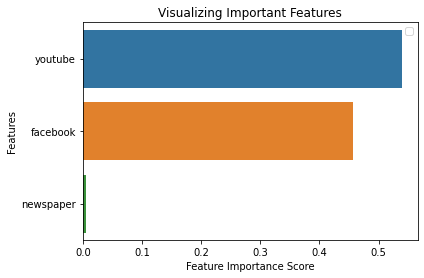

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [24]:
#Visualizing Decision Tree
feature=dataset.columns[0:3] #get the indicator feature
target=dataset['sale_label'].unique() #get the target values

In [25]:
target

[High, Medium, Low]
Categories (3, object): [Low < Medium < High]

In [26]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image  
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=feature,  
                                class_names=target) 

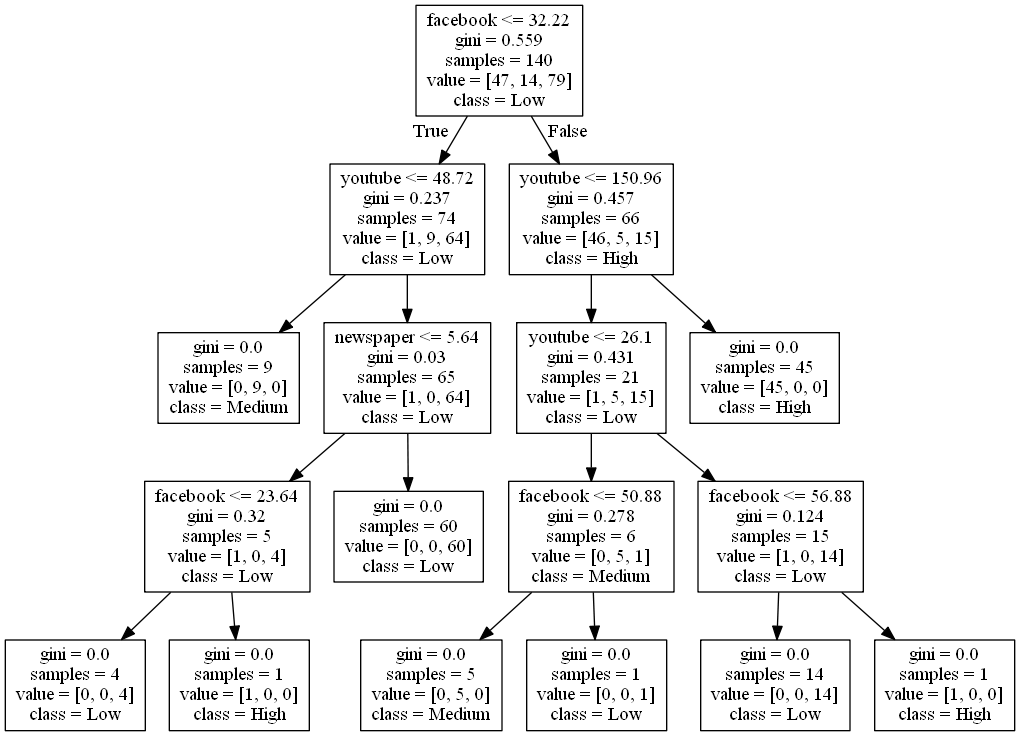

In [27]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [28]:
# Create PDF
graph.write_pdf("D:/marketing.pdf")
# Create PNG
graph.write_png("D:/marketing.png")

True

In [66]:
dataset.to_excel('D:/marketing_classification.xlsx') #Save to excel file